# Predicting NBA Player Salary using Player Statistics
## By Vinnie Toor

### Problem Statement
Every year, the NBA is increasing their team salary cap. This year the league's salary cap is expected to increase to $94 Million. This spike in salary cap is resulting in players signing larger contracts than ever before. That being said, all of these players do not always deserve these huge contracts when considering their statistical performance.

### Project Goals

For this project I am working with NBA player statistics data and NBA salary data. I primarily have two goals to accomplish with this data:

- Get a better understanding of what the most important factors are in determining salary for any given player

- Create a predictive model that will predict the salary of a player based on their statistics for the year. This model would help team owners further assess whether a player is truly worth the amount the player is asking for and ultimately save the team cap space when debating signing a particular player that has a high asking price. Also, this model could be used by future NBA draft picks to gauge a cluster of statistics that they need to hit in order to earn a certain dollar amount. 

### Data

- I used two different websites to scape data for this project. All of my player statistics data was scraped from www.basketball.realgm.com and all of my yearly salary data was scraped from www.espn.com. 

- I decided to use the past 5 years worth of statistics. Scraping data from www.basketball.realgm.com left me with many NaN values due to some players not being "qualified" for certain advanced statistics. According to www.basketball.realgm.com, a "qualified" player is one who is on pace to play in at least 70 games a season for the major statistical categories such as Points, Rebounds, Assists, Steals, and Blocks. A "qualified" player for the Field Goals Made category must be on pace to make 300 Field Goals in a season. A "qualified" player in the Three Point Field Goals Made category must be on pace to make 55 three pointers in a season. And finally a "qualified" player in the Minutes and Advanced categories must be on pace to play 500 minutes in a season.

- Since I wanted to use as many players as I could in the past five years, I did not want to drop the players that were not "qualified" in certain categories. Instead I replaced their NaN values with zeros, with the assumption that if they are not on pace to play 500 minutes or at least 70 games, then a zero in that category would be representative of their lack of stats. 

- After scraping statistics for the past five years and cleaning all my columns, I was left with a dataset of 1890 rows and 56 columns. This is a relatively small dataset however, my plan was to create a model first and then worry about throwing in more data after I had a model that was working well.

### Data Dictionary

#### Basic Stats
- Salary : Player salary for given year
- Position: Player's position
- Year : Year of stats
- ASTtoTOV : Average Assists to Turnover Ratio (Ball Security)
- STLtoTOV : Average Steals to Turnover Ratio (Defensive aggression vs. Ball Security)
- FTAtoFGA : Average Free Throws Attempted to Field Goals Attempted (Draw Foul Rate)
- 3p% : Average of Three Point percentage per game
- 3PA : Average of Three Pointers Attempted per game
- 3PM : Average of Three Pointers Made per game
- AST : Average of Assists per game
- BLK : Average of Blocks per game
- DRB : Average of Defensive Rebounds per game
- FG% : Average of Field Goal Percentage per game
- FGA : Average of Field Goal Attempts per game
- FGM : Average of Field Goals Made per game
- FT% : Average of Free Throw Percentage per game
- FTA : Average of Free Throw Attempts per game
- FTM : Average of Free Throws Made per game
- GP : Games Played during the season
- MIN : Average of minutes played per game
- ORB : Average of Offensive Rebounds per game
- PF : Average of Personal Fouls per game
- PTS : Average of Points per game
- Player : Name of Player
- REB : Average of Offensive and Defensive Rebounds per game
- STL : Average of Steals per game
- TOV : Average of Turnovers per game
- Team : Team name of Player

#### Advanced and Misc Stats
- AST% : Assist Percentage (A measurement of the percentage of assists a player records in relation to the team's overall total while he is in the game)
- BLK% : Block Percentage (A measurement of the percentage of blocks a player records in relation to the opponents two point field goal attemps)
- DRB% : Defensive Rebound Percentage (A measurement of the percentage of defensive rebounds a player secures that are available to his team)
- Drtg : Defensive Rating (The number of points a player allows per 100 possessions)
- FIC : Floor Impact Counter (A formula to encompass all aspects of the box score into a single statistic. The intent of the statistic is similar to other efficiency stats, but assists, shot creation and offensive rebounding are given greater importance)
- ORB% : Offensive Rebound Percentage (A measurement of the percentage of offensive rebounds a player secures that are available to his team)
- Ortg : Offensive Rating (The number of points a player produces per 100 possessions)
- PER : Player Efficieny Rating (for more information: https://en.wikipedia.org/wiki/Player_efficiency_rating)
- PPR : Pure Point Rating (100 x (League Pace / Team Pace) x ([(Assists x 2/3) - Turnovers] / Minutes)
- STL% : A measurement of the percentage of steals a player records in relation to the team's overall total while he is in the game
- TOV% : A measurement of the percentage of turnovers a player records in relation to the team's overall total while he is in the game.
- TRB% : A measurement of the percentage of both offensive and defensive rebounds a player secures that are available to his team
- TS% : True Shooting Percentage (A measurement of efficiency as a shooter in field goal attempts, three-point field goal attempts and free throws)
- TotalS% : Total shooting percentage (The sum of a player's field goal, free throw and three-point percentage)
- USG% : Usage Percentage (A measurement of the percentage of plays utilized by a player while he is in the game)
- eDiff : Efficiency Differential (The difference between a team or player's ORtg and DRtg)
- eFG% : Effective Field Goal Percentage (A measurement of efficiency as a shooter in all field goal attempts with three-point attempts weighted fairly)
- 20ast : Count of games with 20 assists or more during season
- 40pts : Count of games with 40 points or more during season
- 5blk : Count of games with 5 blocks or more during season
- 5stl : Count of games with 5 steals or more during season
- DBLDBL : Double Double (At least 10 during a single game in two categories from points, rebounds, assists, blocks and steals)
- HOB : Hands on Buckets (Number of buckets a player is directly involved in whether as the scorer or passer. The formula is field goals plus assists divided by team field goals
- TRPLDBL : Triple Double (At least 10 during a single game in three categories from points, rebounds, assists, blocks and steals)
- high_game : Showing the highest point total for one game during the season
- techs : Count of technical fouls for the season

### Loading all the libraries I'll be using in the models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

//anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


For data scraping and cleaning refer to: https://github.com/vinnietoor/DSI-SF-4-vinnietoor/blob/master/capstone_stuff/scraping_and_cleaning.ipynb and https://github.com/vinnietoor/DSI-SF-4-vinnietoor/blob/master/capstone_stuff/merge_5_years_data_and_cleaning.ipynb

### Reading in saved csv file

In [3]:
df = pd.read_csv('../capstone_stuff/five_years.csv')

In [4]:
#cleaning up a merging error
df.drop('Unnamed: 0', inplace=True, axis=1)

#### Setting up my dataframe so that I can start a model

In [5]:
#bringing salary column to front of dataframe
cols = df.columns.tolist()
cols = cols[50:] + cols[:50]

In [6]:
df = df[cols]

In [7]:
#dropping categorical values in df so I can start a model
df_values = df.drop(['Player', 'Team', 'Position', 'Year'], axis=1)

In [8]:
#creating a mask for all 'inf' values
mask = ((df_values.ASTtoTOV == np.inf) | (df_values.STLtoTOV == np.inf) | (df_values.FTAtoFGA == np.inf))

In [9]:
#using mask on df to get rid of all 'inf' values
df_values = df_values[~mask]

### Before Modeling, EDA!

In [10]:
df.head()

,Salary,Position,Year,ASTtoTOV,STLtoTOV,FTAtoFGA,3P%,3PA,3PM,AST,...,20ast,20reb,40pts,5blk,5stl,DBLDBL,HOB,TRPLDBL,high_game,techs
0,19444503.0,SF,13,1.000000,0.307692,0.342342,0.379,6.2,2.3,2.6,...,0.0,0.0,8.0,0.0,0.0,10.0,0.341,0.0,50.0,15.0
1,17832626.0,SF,13,1.314286,0.400000,0.525424,0.416,4.1,1.7,4.6,...,0.0,0.0,6.0,0.0,2.0,19.0,0.358,3.0,52.0,13.0
2,30453805.0,SF,13,1.621622,0.378378,0.392157,0.324,5.2,1.7,6.0,...,0.0,0.0,8.0,0.0,2.0,16.0,0.415,2.0,47.0,14.0
3,19067500.0,SF,13,2.400000,0.566667,0.398876,0.406,3.3,1.4,7.2,...,0.0,0.0,1.0,0.0,2.0,36.0,0.447,4.0,40.0,6.0
4,5820417.0,SG,13,1.526316,0.473684,0.596491,0.368,6.2,2.3,5.8,...,0.0,0.0,2.0,0.0,3.0,9.0,0.350,1.0,46.0,4.0


### Taking a look at a heatmap of my categories

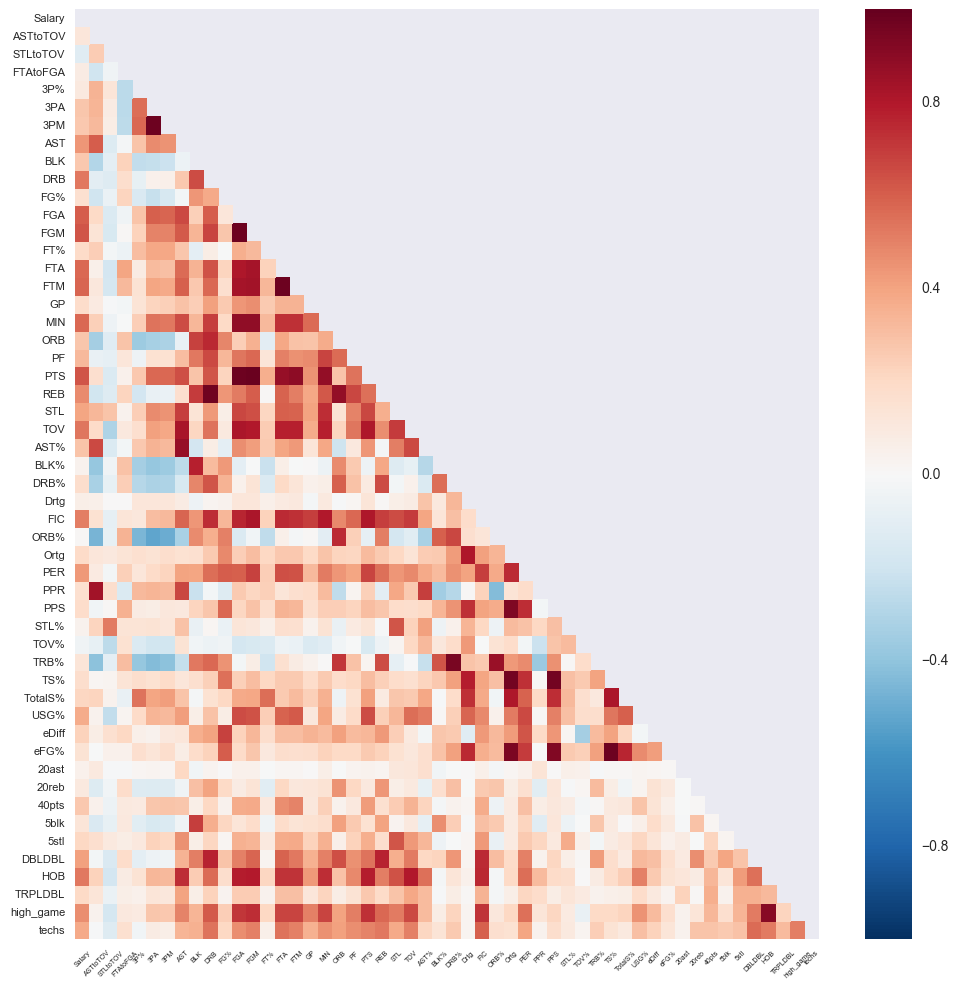

In [11]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=False)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=5, rotation=45)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
correlation_heat_map(df_values)

- Clearly there are many dark red squares in my heatmap indicating a lot of multicolinearity. 
    - A ridge model might be best for this type of dataset considering it deals with multicolinearity the best.
- Lets take a look at some other variables and see how they correlate with salary

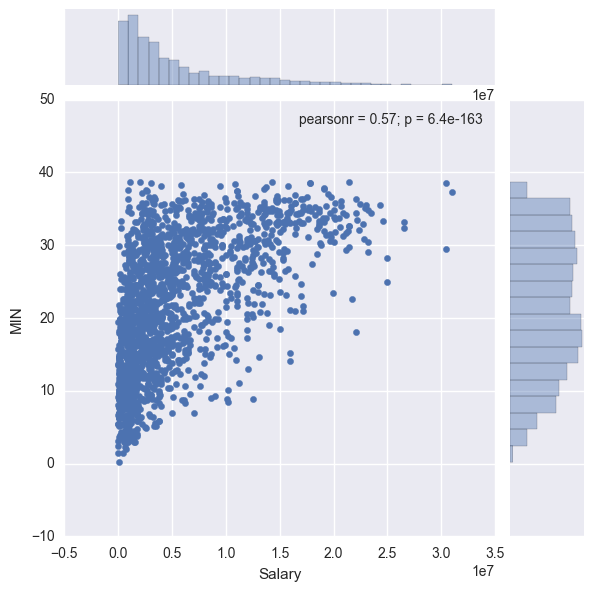

In [12]:
sns.jointplot(df_values.Salary, df_values['MIN'])

plt.show()


### Minutes played shows a pearsonR of 0.57. 
Although there is some noise on the upper left part of the scatter plot, there is still a trend showing that higher salaries are given to players who are going to be playing a lot. This intuitively makes sense considering these are the players that the teams rely on the most.

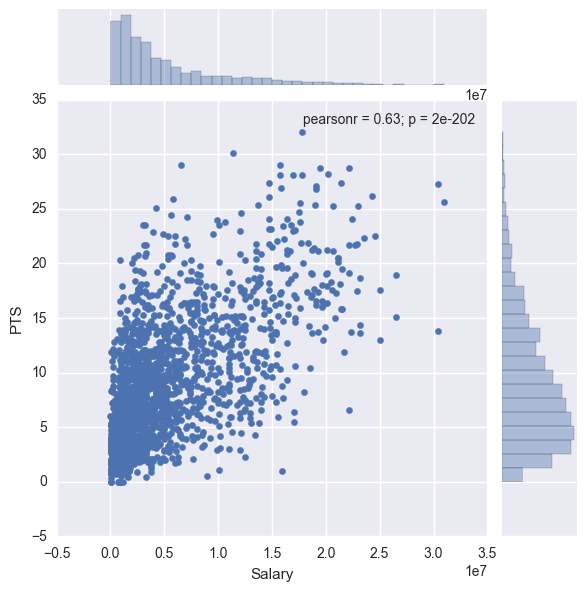

In [13]:
sns.jointplot(df_values.Salary, df_values['PTS'])

plt.show()

### Points shows an even higher pearsonR of 0.63.
This is not suprising. More points equals more wins. Makes sense that teams are paying more money to the players who are most responsible for scoring the points. 

### Let's take a look at how Salary is distributed among the different Position categories.

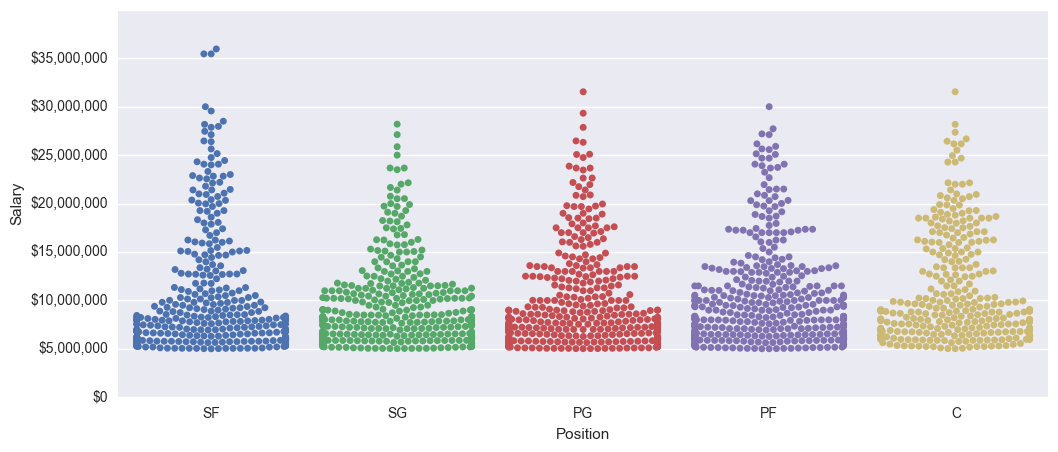

In [158]:
fig, ax = plt.subplots(figsize=(12,5))
sns.swarmplot(df.Position, df.Salary, edgecolor='white')
ax.set_yticklabels(['$0', '$5,000,000', '$10,000,000', '$15,000,000', '$20,000,000', '$25,000,000', '$30,000,000', '$35,000,000'])

plt.show()

### Seems that the swarmplot is showing a thicker tree for the Power Forward and Point Guard positions.
Power forwards are shown as the category with most players with salary in between $10 - $15 Million. For a young developing player, if he is blessed with the size and strength to be able to play with other big men in the NBA, it would be financially beneficial to focus on skills of a power forward in addition to those of a center. In today's NBA we are seeing power forwards becoming quicker, leaner, and more skillful than ever before. Focusing on ball handling, agility/athleticism, and shooting range in addition to the big man skills of rebounding, blocking shots, and the ability to score in the post are all important to being a top tier Power Forward.

Among the guard positions it seems that Point Guards have a more consistent distribution of Salary than Small Forwards and Shooting Guards. As a young basketball player who does not have the same size as power forwards and centers, it may be finanically beneficial to focus on skills such as ball handling, passing, shooting, quickness, and court IQ that would make them a point guard. Since not many players are able to perform these skills at a high efficient level, Point Guards are obviously going to be valued higher than the other guard positions.

### Taking a look at how much money each team is spending on salary

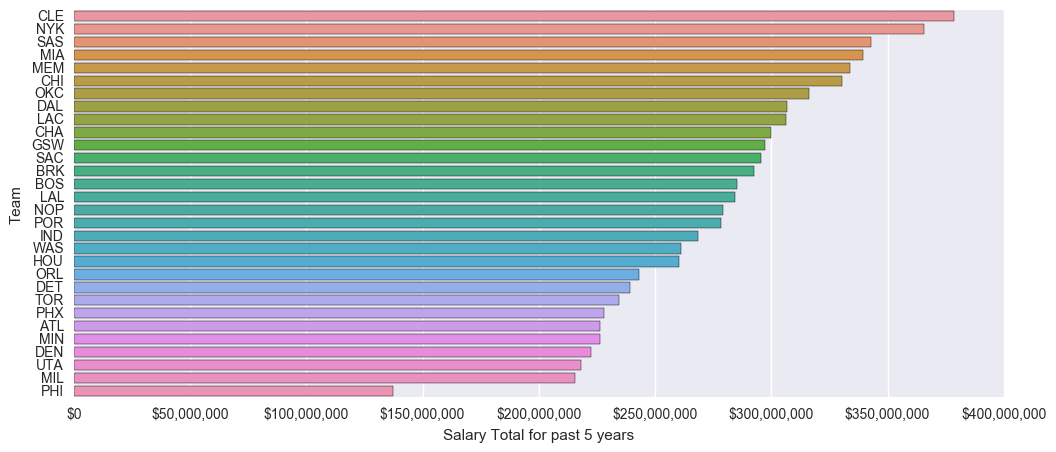

In [75]:
team_sals = df.groupby("Team").agg(np.sum).sort_values('Salary', ascending=False).reset_index().iloc[1::]
# colors=sns.color_palette("hls", 10)
fig, ax = plt.subplots(figsize=(12,5))

ax.set_xticklabels(['$0', '$50,000,000', '$100,000,000', '$150,000,000', '$200,000,000', '$250,000,000', '$300,000,000', '$350,000,000', '$400,000,000'])
sns.barplot(x=team_sals.Salary, y=team_sals.Team, ax=ax)

ax.set_xlabel('Salary Total for past 5 years')


plt.show()

### Big market teams are spending the most money
- New York, San Antonio, and Miami are all among the biggest markets in the nation. Not suprsing that they are spending the most money in the league on their player salaries. 
- It is important to notice the small amount of money Philadelphia is spending on player salaries. This is probably due to the fact that they are the worst team in the league for the past few years resulting in a roster full of new draft picks. Until these new draft picks get out of their rookie contracts(assuming they decide to resign with Philadelphia) and until the team improves their win record, Philadelphia will continue to spend far less than the other teams in the league.
- Might be important to market this predictive model for the teams that are spending the most money on salaries for their players. Especially the teams who are spending a lot of money but are not seeing the success in winning games (Ex. New York Knicks)

### Splitting data for modeling

In [14]:
#salary is target
#everything else is predictors
y = df_values.Salary.values
X = df_values.iloc[:,1:]

In [15]:
ss = StandardScaler()

# use the "fit_transform" function to normalize the X design matrix
Xn = ss.fit_transform(X)

In [16]:
#splitting data 70:30
Xtrain, Xtest, ytrain, ytest = train_test_split(Xn, y, test_size=0.3)

### Basic Linear Regression Model

In [17]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, Xtrain, ytrain, cv=5)

print linreg_scores
print np.mean(linreg_scores)

[ 0.56131493  0.38631691  0.42125268  0.45823544  0.54652042]
0.47472807587


In [31]:
linreg.fit(Xtrain, ytrain)
linreg.score(Xtest, ytest)

0.34453859658250813

In [19]:
lr_coef_df        =   pd.DataFrame(linreg.coef_, columns=["linear_coef"])
lr_coef_df.index  =   X.columns

In [20]:
#creating df to look at coefs
linreg_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':linreg.coef_,
                            'abs_coef':np.abs(linreg.coef_)})

linreg_coefs.sort_values('abs_coef', inplace=True, ascending=False)

linreg_coefs

,abs_coef,coef,variable
19,1.135174e+07,1.135174e+07,PTS
8,6.626062e+06,6.626062e+06,DRB
20,4.682032e+06,-4.682032e+06,REB
10,4.377383e+06,-4.377383e+06,FGA
30,2.827316e+06,-2.827316e+06,PER
36,2.404803e+06,2.404803e+06,TS%
6,2.208807e+06,2.208807e+06,AST
23,2.018682e+06,-2.018682e+06,AST%
35,1.881431e+06,-1.881431e+06,TRB%
17,1.741609e+06,1.741609e+06,ORB


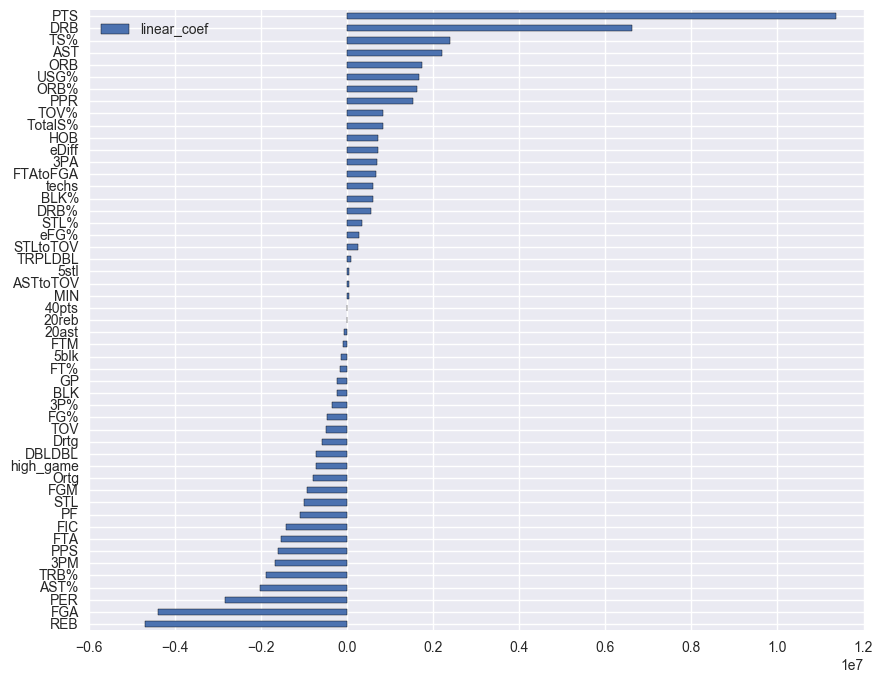

In [21]:
lr_coef_df.sort_values("linear_coef").plot(kind="barh", figsize=(10,8))

#### Linear regression is putting a very heavy weight on Points

- Although Points is definitely an important indicator of a player's worth, it should not have such a high weight so that the other statistical categories are almost irrelevent. 
- Many would argue that the Points category is in fact the most important category for player statistics however for this model, I am looking for a predictor that is going to be more uniform with its weighting. 
- It is important to notice the cross validated score of 0.47 however. Regardless of how I feel about the model, it is performing decently. 

### Ridge model

In [22]:
ridge_alphas = np.logspace(-2, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(Xtrain, ytrain)

print optimal_ridge.alpha_

21.9638537242


In [23]:
#cross validating using ridge on training data
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xtrain, ytrain, cv=5)

print ridge_scores
print np.mean(ridge_scores)

[ 0.56286909  0.43349359  0.44677073  0.45628845  0.53429891]
0.48674415361


In [24]:
#checking score on test data
ridge.fit(Xtrain, ytrain)
ridge.score(Xtest, ytest)

0.36718640465294838

In [25]:
ridge_coef_df        =   pd.DataFrame(ridge.coef_, columns=["ridge_coef"])
ridge_coef_df.index  =   X.columns

In [26]:
#creating df to look at coefs
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('coef', inplace=True, ascending=False)

ridge_coefs

,abs_coef,coef,variable
11,1.693267e+06,1.693267e+06,FGM
8,1.684951e+06,1.684951e+06,DRB
19,1.395042e+06,1.395042e+06,PTS
6,1.241726e+06,1.241726e+06,AST
20,9.374478e+05,9.374478e+05,REB
34,6.498163e+05,6.498163e+05,TOV%
47,6.085209e+05,6.085209e+05,HOB
50,5.538112e+05,5.538112e+05,techs
37,5.053135e+05,5.053135e+05,TotalS%
14,4.978891e+05,4.978891e+05,FTM


In [47]:
ridge_coef_df = pd.DataFrame(optimal_ridge.coef_, columns=["ridge_coef"])
ridge_coef_df.index = X.columns

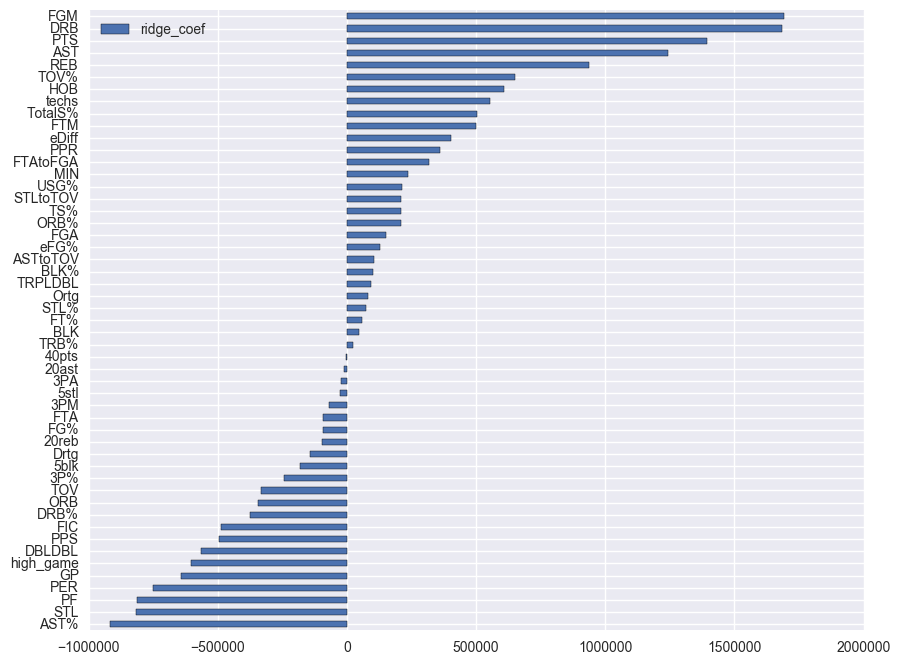

In [32]:
ridge_coef_df.sort_values("ridge_coef").plot(kind="barh", figsize=(10,8))

#### Ridge regression has a more uniform weighting of categories
- The ridge regression model puts a larger weight on Field Goals Made and Defensive Rebounds with Points scored being a close third coefficient. 
- The ridge model uses the categories with weights that make sense intuitively. Defensive Rebounds, Field Goals Made, Points, All Rebounds, and Assists are the top 5 coefficients. 
- Since Rebounds, Assists, and Points are 3 of the 5 major categories in basketball, it makes sense that these three have high weights for predicting salary.
- Also, it is important to notice that the cross validated score of the Ridge model is 0.48 which is not significantly different than the Linear Regression Model. The models are both scoring about the same on the testing data as well.

### Lasso model

In [33]:
#finding optimal lasso alpha
optimal_lasso = LassoCV(n_alphas=1000, cv=5, verbose=1, n_jobs=-1)
optimal_lasso.fit(Xtrain, ytrain)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

22627.5928395


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


In [34]:
#cross validating using lasso on training data
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xtrain, ytrain, cv=5)

print lasso_scores
print np.mean(lasso_scores)

[ 0.56403567  0.43895561  0.44883947  0.46495151  0.53567648]
0.490491746231


In [35]:
lasso.fit(Xtrain, ytrain)
lasso.score(Xtest, ytest)

0.36801900057992676

In [36]:
#creating df to look at coefs
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs

,abs_coef,coef,variable
11,2.722977e+06,2.722977e+06,FGM
8,2.334910e+06,2.334910e+06,DRB
6,1.352521e+06,1.352521e+06,AST
21,7.580682e+05,-7.580682e+05,STL
15,7.366801e+05,-7.366801e+05,GP
18,7.023147e+05,-7.023147e+05,PF
23,6.883374e+05,-6.883374e+05,AST%
46,6.394165e+05,-6.394165e+05,DBLDBL
50,4.934079e+05,4.934079e+05,techs
14,4.901307e+05,4.901307e+05,FTM


In [37]:
#Lasso cancels out 33% of features.
print 'Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(Xtrain.shape[1])

Percent variables zeroed out: 0.372549019608


In [38]:
lasso_coef_df        =   pd.DataFrame(lasso.coef_, columns=["lasso_coef"])
lasso_coef_df.index  =   X.columns

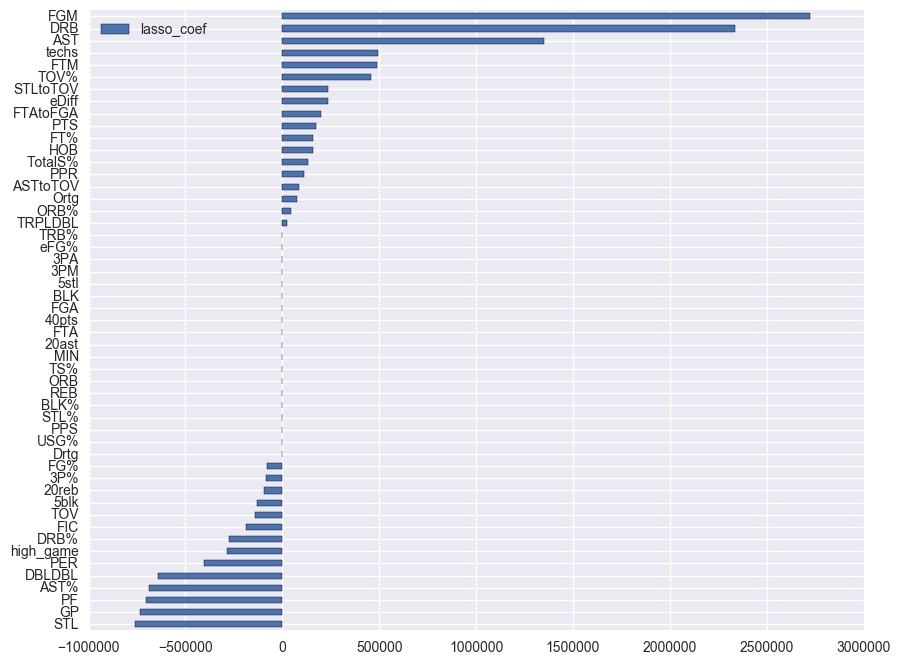

In [40]:
lasso_coef_df.sort_values("lasso_coef").plot(kind="barh", figsize=(10,8))

#### Lasso regression model is zeroing out too many variables
- Although the lasso model is using three of the five major categories, it is zeroing out almost 40% of the categories. This is not ideal because the model is completely ommitting some statistics that intuitively would be correlated with salary including Overall Rebounds and team specific statistical categories.
- The lasso model is also performing very similar to the Linear Regression and Ridge models with a score of 0.49.

### Plotting all my residuals on one plot

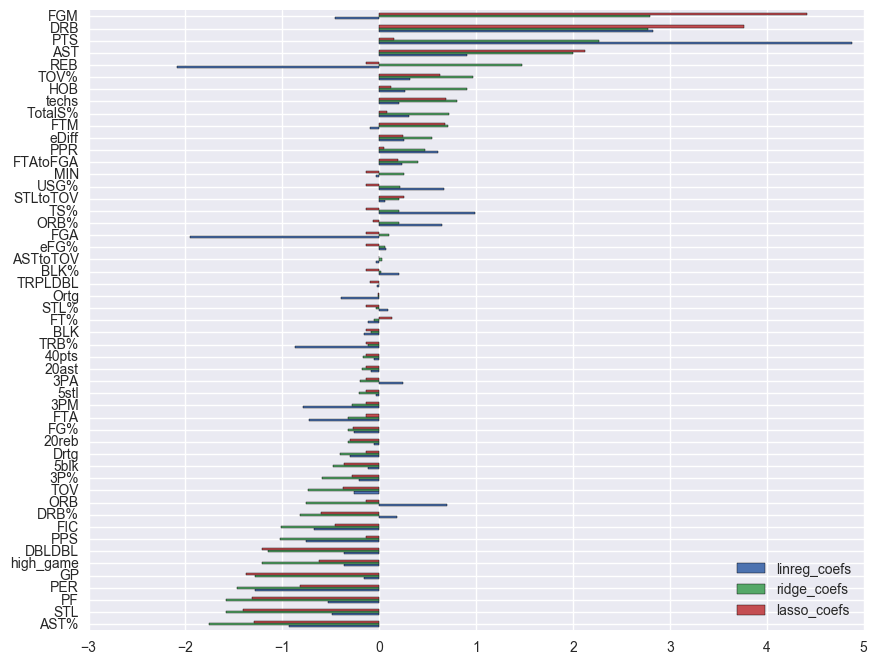

In [84]:
all_coefs = lr_coef_df.join([ridge_coef_df, lasso_coef_df])
all_coefs_ss = ss.fit_transform(all_coefs)
all_coefs_ss_df = pd.DataFrame(all_coefs_ss, columns=['linreg_coefs', 'ridge_coefs', 'lasso_coefs'])
all_coefs_ss_df.index = all_coefs.index
all_coefs_ss_df.sort_values("ridge_coefs", ascending=True).plot(kind="barh", figsize=(10, 8))

### Using a mask to make plot more readable

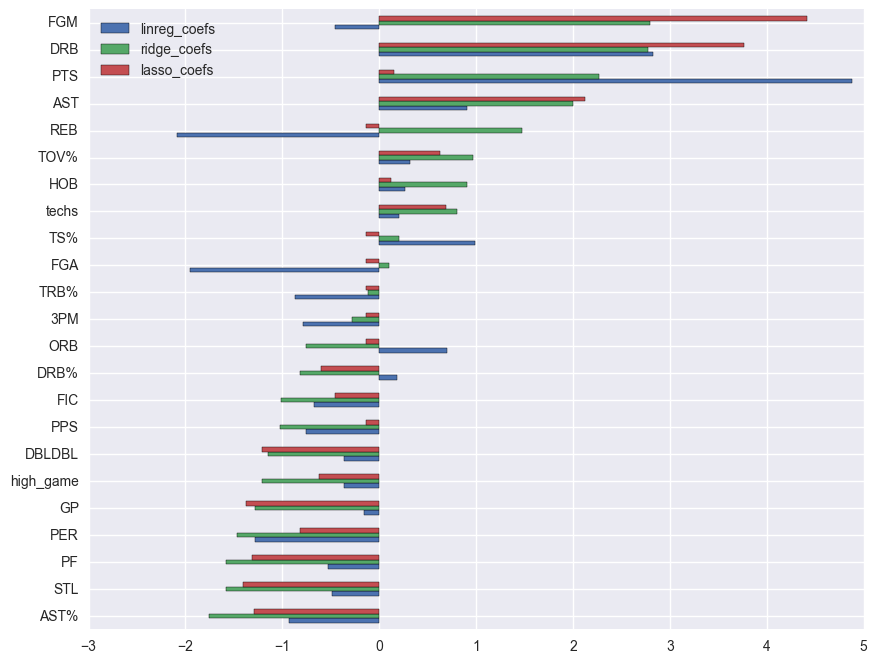

In [86]:
mask = all_coefs_ss_df.apply(lambda row: any(row.abs().values > 0.75), axis=1)
all_coefs_ss_df[mask].sort_values("ridge_coefs", ascending=True).plot(kind="barh", figsize=(10, 8))

### ElasticNet model

In [41]:
#finding optimal enet alpha and l1 ratio
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(Xtrain, ytrain)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

23203.0771337
1.0


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    9.5s finished


#### Enet Model is the same as using a Lasso model becuase it is putting 100% weight on the lasso.

In [42]:
#cross validating enet with training data
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xtrain, ytrain, cv=5)

print enet_scores
print np.mean(enet_scores)

[ 0.56417624  0.43896491  0.44862447  0.46483861  0.53586324]
0.490493495326


In [43]:
# Need to fit the ElasticNet and Ridge outside of cross_val_score like i did with the ridge
ridge.fit(Xtrain, ytrain)
enet.fit(Xtrain, ytrain)
lasso.fit(Xtrain, ytrain)


Lasso(alpha=22627.592839544555, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

### ElasticNet model is weighting the L1 ratio at 1.0.
- This 1.0 L1 ratio essentially makes the ENet model the same as the Lasso Regression model. 

### Regression Models summary:
- All four of the models are scoring around the same with a score of about 0.45.
- The ridge regression model makes the most sense intuitively because it is weighting the statistical categories uniformly rather than putting a heavy weight on just one or two categories like the linear regression did.
- Also the Ridge handles the multicolinearity of my dataset a lot better than the Lasso does. The ridge weights all the categories appropriately while the Lasso completely zeroes out almost half my predictors, many of which are important to consider when predicting salary. 

### Plotting residuals

In [44]:
# model residuals:

ridge_resid = ytrain - ridge.predict(Xtrain)
lasso_resid = ytrain - lasso.predict(Xtrain)
enet_resid = ytrain - enet.predict(Xtrain)

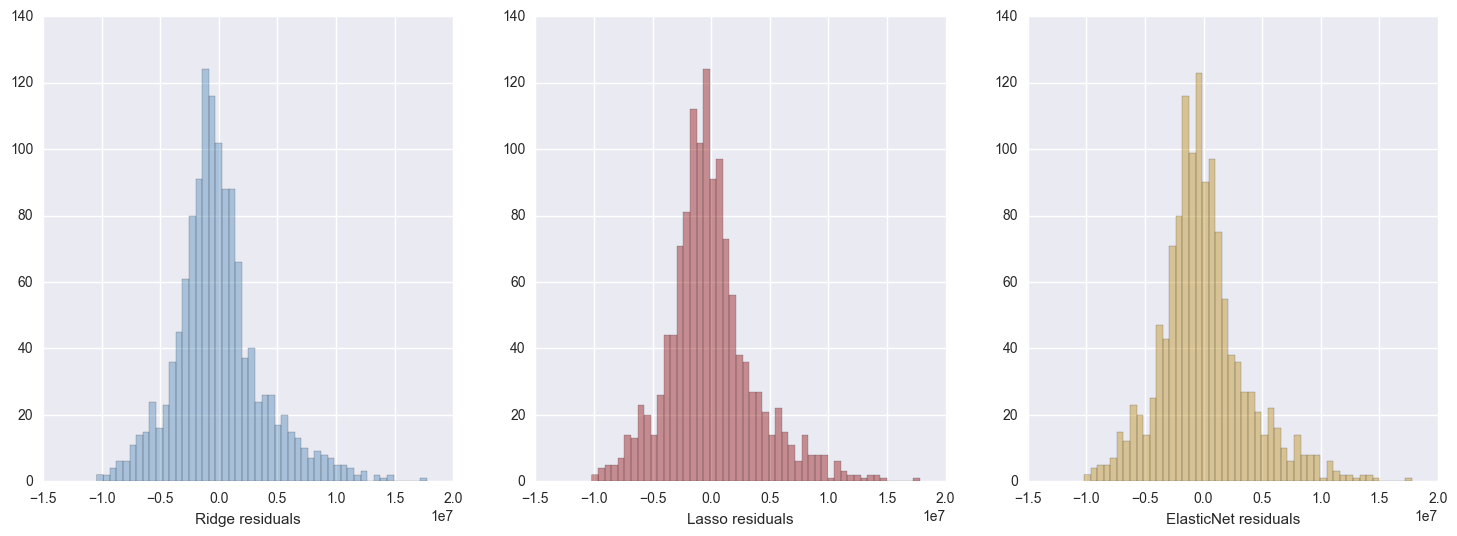

In [45]:
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], axlabel='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], axlabel='Lasso residuals')

sns.distplot(enet_resid, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], axlabel='ElasticNet residuals')

plt.show()

### Residuals Notes
- My residual plots are all pretty much the same considering my scores were all around the same as well.
- The residuals are plotted inbetween -1 and 1 which is good. This means my model has little variance however it leads me to question the bias of my model. 

### Now lets take a look at where the model is predicted best and worst

In [49]:
df_values['Predicted'] = ridge.predict(Xn)

In [50]:
pred_df = df_values[['Salary', 'Predicted']]

In [51]:
pred_df['sal_difference'] = pred_df['Salary'] - pred_df['Predicted']

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
pred_df = pd.concat([pred_df, df.iloc[:,1:]], axis=1)

In [53]:
pred_df = pred_df[['Player', 'Year', 'Salary', 'Predicted', 'sal_difference']]

In [54]:
pred_df = pred_df.dropna()

In [55]:
pred_df['abs_diff'] = np.abs(pred_df['sal_difference'])

In [56]:
pred_df = pred_df.sort_values('abs_diff', ascending=True)

In [57]:
pred_df.head()

,Player,Year,Salary,Predicted,sal_difference,abs_diff
318,draymond_green,13,850000.0,8.500091e+05,-9.061501,9.061501
118,randy_foye,13,2500000.0,2.498697e+06,1302.855772,1302.855772
420,jeff_green,14,8700000.0,8.698093e+06,1906.631655,1906.631655
598,samuel_dalembert,14,3700748.0,3.703066e+06,-2317.723711,2317.723711
372,chris_wright,13,27859.0,3.059475e+04,-2735.751754,2735.751754


In [58]:
pred_df.tail()

,Player,Year,Salary,Predicted,sal_difference,abs_diff
1602,dirk_nowitzki,17,25000000.0,1.058090e+07,1.441910e+07,1.441910e+07
1556,mike_conley,17,26540100.0,1.188443e+07,1.465567e+07,1.465567e+07
1184,kobe_bryant,16,25000000.0,7.938132e+06,1.706187e+07,1.706187e+07
1732,chandler_parsons,17,22116750.0,4.386914e+06,1.772984e+07,1.772984e+07
455,kobe_bryant,14,30453805.0,1.109463e+07,1.935918e+07,1.935918e+07


### Things to note:
- Model is performing most accurately on the players who are new to the NBA.
- Model is least accurate at predicting salary for players who have been in the NBA for many years and can be considered "super stars"

### Plotting actual salary vs. predicted salary using training and testing data

#### Model is performing pretty well on training data with a pearsonr of 0.73.

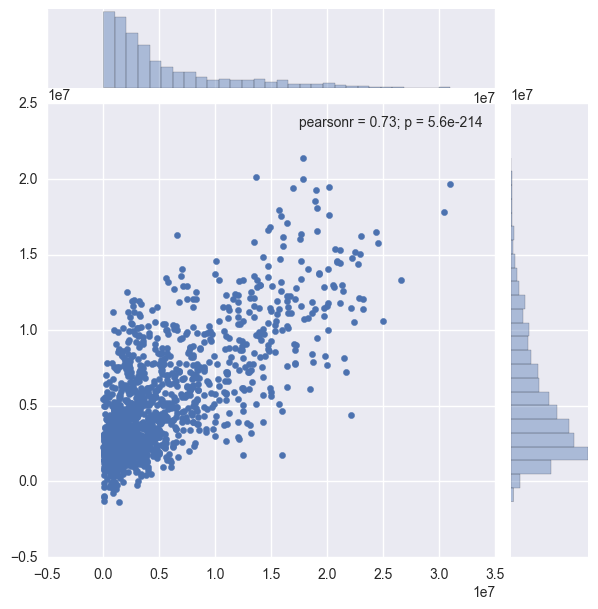

In [79]:
salary_pred = ridge.predict(Xtrain)
sns.jointplot(ytrain, salary_pred)

#### Model is performing not as good but still decent on testing data with a pearsonr of 0.58

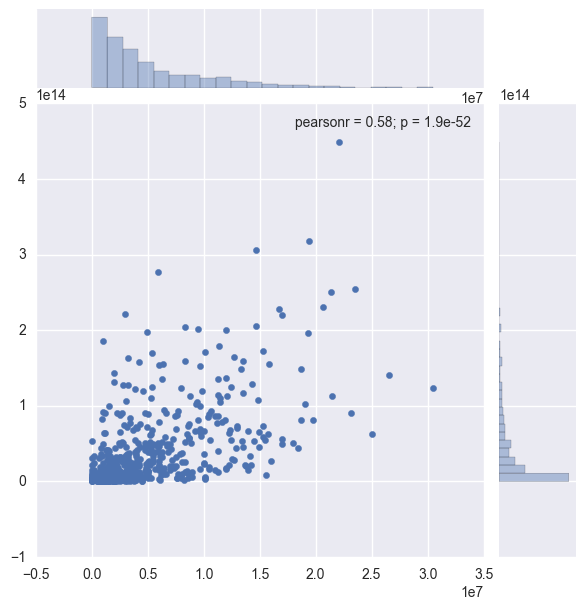

In [82]:
salary_pred = ridge.predict(Xtest)
sns.jointplot(ytest, salary_pred**2)

### Lets have some fun with the model by creating a player

In [70]:
X.columns

Index([u'ASTtoTOV', u'STLtoTOV', u'FTAtoFGA', u'3P%', u'3PA', u'3PM', u'AST',
       u'BLK', u'DRB', u'FG%', u'FGA', u'FGM', u'FT%', u'FTA', u'FTM', u'GP',
       u'MIN', u'ORB', u'PF', u'PTS', u'REB', u'STL', u'TOV', u'AST%', u'BLK%',
       u'DRB%', u'Drtg', u'FIC', u'ORB%', u'Ortg', u'PER', u'PPR', u'PPS',
       u'STL%', u'TOV%', u'TRB%', u'TS%', u'TotalS%', u'USG%', u'eDiff',
       u'eFG%', u'20ast', u'20reb', u'40pts', u'5blk', u'5stl', u'DBLDBL',
       u'HOB', u'TRPLDBL', u'high_game', u'techs'],
      dtype='object')

In [87]:
my_player = [2,.4,.375,.416,6,2.5,6,0.3,4.5,.50,16,8,.8,6,4.8,70,30,.5,2,18,4.5,1.2,3,18,2,13,90,1200,1.9,120,22,0,1.5,1.9,10,10,0.5,150,25,30,.5,0,0,1,0,1,5,.25,0,40,5]
my_player = np.array([my_player])
my_player = ss.fit_transform(my_player)
ridge.predict(my_player)

array([ 5171415.42109798])

### Create A Player Summary

- The player I created was suppose to be a shooting guard who is not necissarily a 'superstar' but he is also not a player who would ride the bench all game.
- The player I created would average about 18 points per game, 5 rebounds, and 6 assists.
- After regularizing my player's stats, the ridge model predicted that the salary for this player should be about $5,171,415.
- This predicted salary sounds about right, maybe even a bit on the lower end for a player scoring as much as he is.
- To further validate this predicted sallary, I would have to group together players who have similar stats and see how the created player's salary varies from the actual player's salaries.

## Conclusion and Next Steps
- Gather lots more data!!!
- Create more predictor categories:
    - Team market size
    - Player Popularity (Jersey sales? Twitter Followers? Endorsement deals?)
    - Player age
    - Player consistency/variance (attempted to try this, however five years of data was not enough to do this properly)
    - Player injuries
    - Severity of injuries
    - Years in league
- Set rules for model that mirror NBA cap rules
- Dive further into EDA
